In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
df = pd.read_csv("./data/PECVD_PROCESS.csv")
df.head()

,EQUIPMENTID,SUBEQUIPMENTID,JobNo,StepNumber,DataVar_Recipe,N2_MPressure,SiH4_Pressure,NH3_Pressure,N2O_Pressure,BoatID,...,VacuumPressurePVmilliTorr,VacuumPressurePV,StepName,SITEID,TubeID,ArcCount,Alarm1,Alarm2,Alarm3,Warning
0,JC02-AR-18,JC02-AR-18-MP-TUBE03,60149,40,SL-F09_002,49.900002,33.500000,43.599998,42.0,107,...,10000,766.000000,NaN,9012C,3,0,NaN,NaN,NaN,NaN
1,JC02-AR-18,JC02-AR-18-MP-TUBE03,60149,40,SL-F09_002,49.900002,33.500000,43.599998,42.0,107,...,10000,766.000000,NaN,9012C,3,0,NaN,NaN,NaN,NaN
2,JC02-AR-18,JC02-AR-18-MP-TUBE03,60149,40,SL-F09_002,49.900002,33.599998,43.599998,42.0,107,...,10000,765.900024,NaN,9012C,3,0,NaN,NaN,NaN,NaN
3,JC02-AR-18,JC02-AR-18-MP-TUBE03,60149,40,SL-F09_002,49.900002,33.599998,43.599998,42.0,107,...,10000,765.900024,NaN,9012C,3,0,NaN,NaN,NaN,NaN
4,JC02-AR-18,JC02-AR-18-MP-TUBE03,60149,40,SL-F09_002,49.900002,33.599998,43.599998,42.0,107,...,10000,766.000000,NaN,9012C,3,0,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['EQUIPMENTID', 'SUBEQUIPMENTID', 'JobNo', 'StepNumber',
       'DataVar_Recipe', 'N2_MPressure', 'SiH4_Pressure', 'NH3_Pressure',
       'N2O_Pressure', 'BoatID',
       ...
       'VacuumPressurePVmilliTorr', 'VacuumPressurePV', 'StepName', 'SITEID',
       'TubeID', 'ArcCount', 'Alarm1', 'Alarm2', 'Alarm3', 'Warning'],
      dtype='object', length=109)

### Data Preprocessing - Step

In [9]:
feat_col = ['T_SpikeCenterZonePV', 'T_SpikeCenterZoneActualSV', 'StepNumber']
df_step = df[feat_col]
df_step.rename(columns={'T_SpikeCenterZonePV':'CenterZonePV', 
                        'T_SpikeCenterZoneActualSV':'enterZoneActualSV'}, inplace=True)
df_step.head()

c:\python37\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,CenterZonePV,enterZoneActualSV,StepNumber
0,506.000000,510.0,40
1,506.200012,510.0,40
2,506.299988,510.0,40
3,506.500000,510.0,40
4,506.700012,510.0,40


In [26]:
# choice_col = ['JobNo', 'StepNumber', 'N2_MPressure', 'SiH4_Pressure', 'NH3_Pressure']
step_col = ['JobNo', 'StepNumber', 'N2_MPressure',]
df_step = df[choice_col]
df_step.head()

,JobNo,StepNumber,N2_MPressure
0,60149,40,49.900002
1,60149,40,49.900002
2,60149,40,49.900002
3,60149,40,49.900002
4,60149,40,49.900002


In [30]:
step_count = df_step.groupby(['JobNo', 'StepNumber']).count().sort_values(['JobNo', 'StepNumber'])
step_count.rename(columns={'N2_MPressure':'StepCount'}, inplace=True)
step_count.head()

StepCount
JobNo StepNumber           
0     40                307
60149 1                   5
      2                 128
      3                 109
      4                 168

In [286]:
step_count_sum = step_count.groupby('JobNo').cumsum()
step_count_sum.rename(columns={'StepCount':'StepCountSum'}, inplace=True)
step_count_sum.head()

StepCountSum
JobNo StepNumber              
0     40                   307
60149 1                      5
      2                    133
      3                    242
      4                    410

In [287]:
df_step_final = pd.concat([step_count ,step_count_sum], axis=1)
df_step_final.head()

StepCount  StepCountSum
JobNo StepNumber                         
0     40                307           307
60149 1                   5             5
      2                 128           133
      3                 109           242
      4                 168           410

### Data Preprocessing - Alarm

In [273]:
alarm_col = ['JobNo', 'StepNumber','Alarm1']
df_alarm = df[alarm_col]
df_alarm.rename(columns={'Alarm1':'AlarmCode'}, inplace=True)
df_alarm.loc[:,'AlarmCode'] = df_alarm.loc[:,'AlarmCode'].fillna(0)

c:\python37\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
c:\python37\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [274]:
df_alarm.loc[:,'startIndex'] = df_alarm.loc[:,'AlarmCode'].str.find('[',0)
df_alarm.loc[:,'endIndex'] = df_alarm.loc[:,'AlarmCode'].str.find(']',0)
df_alarm.head()

c:\python37\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


,JobNo,StepNumber,AlarmCode,startIndex,endIndex
0,60149,40,0,NaN,NaN
1,60149,40,0,NaN,NaN
2,60149,40,0,NaN,NaN
3,60149,40,0,NaN,NaN
4,60149,40,0,NaN,NaN


In [275]:
df_alarm.loc[:,'startIndex'].fillna(0, inplace=True)
df_alarm.loc[:,'endIndex'].fillna(0, inplace=True)
df_alarm.head()

c:\python37\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,JobNo,StepNumber,AlarmCode,startIndex,endIndex
0,60149,40,0,0.0,0.0
1,60149,40,0,0.0,0.0
2,60149,40,0,0.0,0.0
3,60149,40,0,0.0,0.0
4,60149,40,0,0.0,0.0


In [276]:
for i in range(len(df_alarm)):
    if (df_alarm.loc[i,'startIndex']) != 0:
        df_alarm.loc[i,'AlarmCode'] = df_alarm.loc[i,'AlarmCode'][int(df_alarm.loc[i,'startIndex']+1) : int(df_alarm.loc[i,'endIndex'])]
df_alarm.drop(labels=['startIndex', 'endIndex'], axis=1, inplace=True)
df_alarm.head() 

c:\python37\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,JobNo,StepNumber,AlarmCode
0,60149,40,0
1,60149,40,0
2,60149,40,0
3,60149,40,0
4,60149,40,0


In [280]:
for i in range(len(df_alarm)):
    if df_alarm.loc[i,'AlarmCode'] != 0:
        df_alarm.loc[i,'AlarmFlag'] = 1
    else:
        df_alarm.loc[i,'AlarmFlag'] = 0
df_alarm.loc[:,'AlarmFlag'] = df_alarm.loc[:,'AlarmFlag'].astype(int)
df_alarm.head()      

,JobNo,StepNumber,AlarmCode,AlarmFlag
0,60149,40,0,0
1,60149,40,0,0
2,60149,40,0,0
3,60149,40,0,0
4,60149,40,0,0


In [281]:
df_alarm_no_dupl = df_alarm.copy()
df_alarm_no_dupl = df_alarm_no_dupl.drop_duplicates(['JobNo', 'StepNumber', 'AlarmCode'])
df_alarm_no_dupl.loc[:,'AlarmCode'] = df_alarm_no_dupl.loc[:,'AlarmCode'].astype(int)
df_alarm_final = df_alarm_no_dupl.groupby(['JobNo', 'StepNumber']).sum().sort_values(['JobNo', 'StepNumber'])
df_alarm_final.head()

AlarmCode  AlarmFlag
JobNo StepNumber                      
0     40                  0          0
60149 1                  50          1
      2                  50          1
      3                  50          1
      4                   0          0

In [288]:
df_final = pd.concat([df_step_final,df_alarm_final], axis=1)
df_final.head()

StepCount  StepCountSum  AlarmCode  AlarmFlag
JobNo StepNumber                                               
0     40                307           307          0          0
60149 1                   5             5         50          1
      2                 128           133         50          1
      3                 109           242         50          1
      4                 168           410          0          0

In [289]:
df_final.to_csv("problem3_result.csv", index=True)

In [456]:
df_final_fig = df_final.copy()
df_final_fig.reset_index(level=1, inplace=True)
df_final_fig.head()

,StepNumber,StepCount,StepCountSum,AlarmCode,AlarmFlag
JobNo,,,,,
0,40,307,307,0,0
60149,1,5,5,50,1
60149,2,128,133,50,1
60149,3,109,242,50,1
60149,4,168,410,0,0


In [457]:
drop_row = []
job_num = -1

for i in range(len(df_final_fig)):
    if df_final_fig.index[i] == job_num:
        drop_row.append(i)
        continue
        
    if df_final_fig.iloc[i,4] == 1:
        drop_row.append(i)
        job_num = df_final_fig.index[i]

In [458]:
idx = pd.Series(data=np.arange(0,len(df_final_fig)))
df_final_fig = df_final_fig.set_index([idx, df_final_fig.index])
df_final_fig = df_final_fig.drop(df_final_fig.index[drop_row])
df_final_fig.reset_index(level=0, inplace=True)
df_final_fig.drop(columns=['level_0'], axis=1, inplace=True)
df_final_fig.head()

<IPython.core.display.Javascript object>


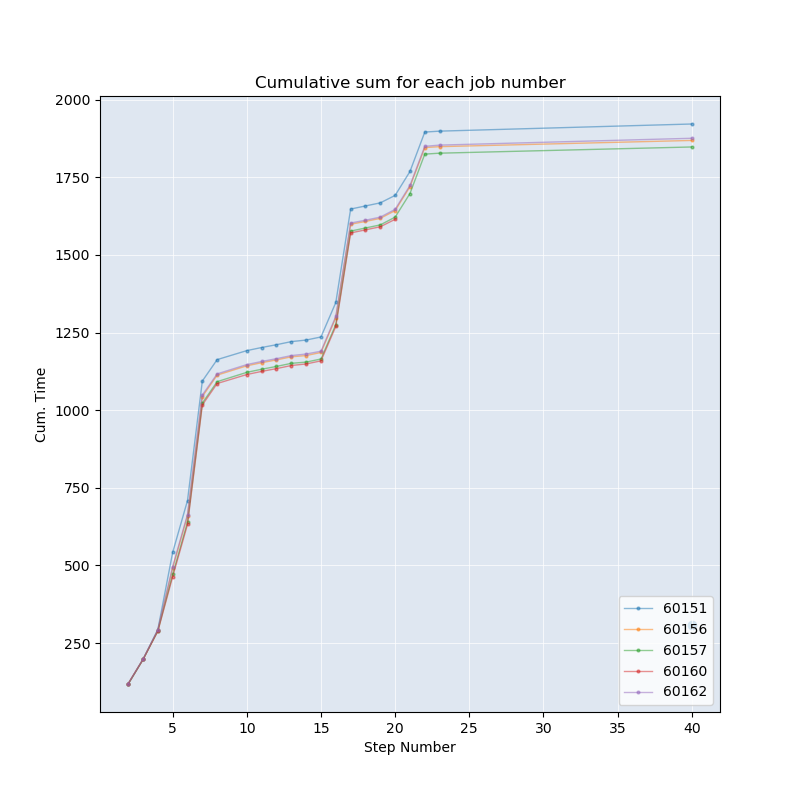

In [465]:
indexes = list(df_final_fig.index.unique())
indexes.pop(0)

fig = plt.figure(figsize=(8,8,))
#fig.patch.set_facecolor('#E0E0E0')
#fig.patch.set_alpha(0.7)

ax = fig.add_subplot(1,1,1)
ax.grid(True, linewidth=0.5, color='#ffffff', linestyle='-')

for idx in indexes:
    ax.plot(df_final_fig.loc[idx]['StepNumber'], df_final_fig.loc[idx]['StepCountSum'], 
             '-o', alpha=0.5, markersize=2, linewidth=1)
    
ax.set_xlabel("Step Number")
ax.set_ylabel("Cum. Time")    
ax.legend(indexes, loc='lower right')
ax.set_title('Cumulative sum for each job number')
ax.set_facecolor('lightsteelblue')
ax.patch.set_alpha(0.4)

<IPython.core.display.Javascript object>


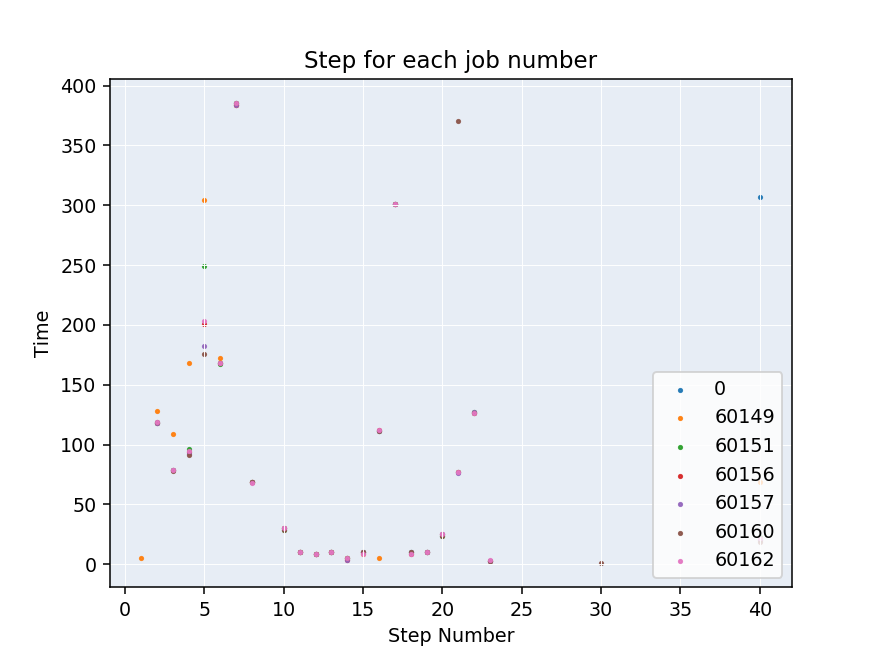

In [376]:
indexes = list(df_final_fig.index.unique())

fig = plt.figure()
#fig.patch.set_facecolor('#E0E0E0')
#fig.patch.set_alpha(0.7)

ax = fig.add_subplot(1,1,1)
ax.grid(True, linewidth=0.5, color='#ffffff', linestyle='-')
for idx in indexes:
    ax.scatter(df_final.loc[idx].index, df_final.loc[idx]['StepCount'], 
             alpha=0.9, s=3)

ax.set_xlabel("Step Number")
ax.set_ylabel("Time")    
ax.legend(indexes, loc='lower right')
ax.set_title('Step for each job number')
ax.set_facecolor('lightsteelblue')
ax.patch.set_alpha(0.3)